In [2]:
import pandas as pd 
import altair as alt

In [3]:
df = pd.read_csv('Downloads/JoeBidenTweets.csv', low_memory=False)

In [4]:
df = df.drop(columns = ['id', 'url'])

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour

In [6]:
df['year'].value_counts()

2020    2928
2019    1846
2012     812
2017     149
2018     130
2016     108
2014      78
2015      11
2007       2
Name: year, dtype: int64

In [7]:
df['month'] = pd.DatetimeIndex(df['timestamp']).month

In [8]:
from nltk import tokenize
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

df['clean_text'] = df['tweet'].apply(lambda x: x.lower())
df['clean_text'] = df['clean_text'].apply(lambda x: x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))

def score_text(text):
    sentence_list = tokenize.sent_tokenize(text)
    cscore = 0.0
    for sent in sentence_list:
        ss = analyzer.polarity_scores(sent)['compound']
        cscore += ss
    if len(sentence_list) > 0:
        return cscore / len(sentence_list)
    else: 
        return cscore
    
df['full_score'] = df['clean_text'].map(lambda t : score_text(t))

In [9]:
df_19_20 = df[df['year'] > 2018]

In [10]:
trump = pd.read_csv('Downloads/tweets_11-06-2020.csv')

trump['date'] = pd.to_datetime(trump['date'])
trump['year'] = pd.DatetimeIndex(trump['date']).year
trump['hour'] = pd.DatetimeIndex(trump['date']).hour

trump['clean_text'] = trump['text'].apply(lambda x: x.lower())
trump['clean_text'] = trump['clean_text'].apply(lambda x: x.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))))

trump['full_score'] = trump['clean_text'].map(lambda t : score_text(t))

trump.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,year,hour,clean_text,full_score
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,2011,18,republicans and democrats have both created ou...,-0.1779
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,2020,1,i was thrilled to be back in the great city of...,0.9771
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,2020,3,rt cbs herridge read letter to surveillance...,0.0000
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,2020,20,the unsolicited mail in ballot scam is a major...,-0.9531
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,2020,13,rt mzhemingway very friendly telling of even...,0.5413


In [11]:
trump_20 = trump[trump['year'] > 2018]
trump_20

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,year,hour,clean_text,full_score
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,2020,1,i was thrilled to be back in the great city of...,0.9771
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,2020,3,rt cbs herridge read letter to surveillance...,0.0000
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,2020,20,the unsolicited mail in ballot scam is a major...,-0.9531
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,2020,13,rt mzhemingway very friendly telling of even...,0.5413
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump ann...,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56,2020,0,rt whitehouse president realdonaldtrump ann...,0.5994
...,...,...,...,...,...,...,...,...,...,...,...,...
55085,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25,2020,3,rt randpaul i don’t know why joebiden think...,-0.5574
55086,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05,2020,3,rt elisestefanik president realdonaldtrump ...,0.5423
55087,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58,2020,1,rt teamtrump live presidential debate deba...,0.0000
55088,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,2020,21,just signed an order to support the workers of...,0.0000


In [12]:
llike19 = df_19_20.sort_values(by=['likes'], ascending = False).tail(20)
mlike19 = df_19_20.sort_values(by=['likes'], ascending = False).head(10)
lrep19 = df_19_20.sort_values(by=['replies'], ascending = False).tail(10)
mrep19 = df_19_20.sort_values(by=['replies'], ascending = False).head(10)
llike = df.sort_values(by=['likes'], ascending = False).tail(20)
mlike = df.sort_values(by=['likes'], ascending = False).head(20)
lrep = df.sort_values(by=['replies'], ascending = False).tail(10)
mrep = df.sort_values(by=['replies'], ascending = False).head(10)

In [13]:
mlike['tweet'].to_list()

["Donald Trump is the worst president we've ever had.",
 'I can’t believe I have to say this, but please don’t drink bleach.',
 'Wear a mask. Wash your hands. Vote out Donald Trump.',
 '...yes https://t.co/RzZ3j3zoAL',
 'One month until Election Day. Let’s do this, America.',
 '.@KamalaHarris, you made us all proud tonight.',
 'Jill and I send our thoughts to President Trump and First Lady Melania Trump for a swift recovery. We will continue to pray for the health and safety of the president and his family.',
 'I’m happy to report that Jill and I have tested negative for COVID. Thank you to everyone for your messages of concern. I hope this serves as a reminder: wear a mask, keep social distance, and wash your hands.',
 'Pitch in $5 to help this campaign fly. https://t.co/CqHAId0j8t https://t.co/NbkPl0a8HV',
 'I’m Joe Biden and I approve this message. https://t.co/TuRZXPE5xK',
 'I’m running as a Democrat, but I will be an American president. Whether you voted for me or against me, I wi

In [14]:
import matplotlib.pyplot as plt

In [15]:
df = df.set_index('timestamp')
df_19_20 = df_19_20.set_index('timestamp')

In [16]:
df['timestamp'] = df.index
df_19_20['timestamp'] = df_19_20.index


In [17]:
avg = df_19_20.groupby(pd.Grouper(freq='W')).mean()
davg = df_19_20.groupby(pd.Grouper(freq='D')).mean()
avg

,replies,retweets,quotes,likes,year,hour,month,full_score
timestamp,,,,,,,,
2019-01-13,1060.000000,7923.000000,253.000000,43003.000000,2019.0,3.000000,1.000000,-0.476700
2019-01-20,143.000000,1051.500000,39.500000,9310.500000,2019.0,3.000000,1.000000,0.672000
2019-01-27,567.333333,4739.333333,187.666667,29038.333333,2019.0,18.666667,1.000000,-0.244500
2019-02-03,601.571429,3584.428571,218.142857,20327.000000,2019.0,2.142857,1.857143,-0.141171
2019-02-10,1707.000000,8210.750000,546.000000,48307.500000,2019.0,11.750000,2.000000,0.556675
...,...,...,...,...,...,...,...,...
2020-10-04,8801.193548,26232.032258,2906.129032,182974.666667,2020.0,12.473118,9.397849,0.190455
2020-10-11,7661.509259,23792.277778,2344.722222,152988.000000,2020.0,12.907407,10.000000,0.185416
2020-10-18,7422.053571,14210.000000,1472.258929,87208.446429,2020.0,14.660714,10.000000,0.274404


In [18]:
avg['timestamp'] = avg.index
avg

,replies,retweets,quotes,likes,year,hour,month,full_score,timestamp
timestamp,,,,,,,,,
2019-01-13,1060.000000,7923.000000,253.000000,43003.000000,2019.0,3.000000,1.000000,-0.476700,2019-01-13
2019-01-20,143.000000,1051.500000,39.500000,9310.500000,2019.0,3.000000,1.000000,0.672000,2019-01-20
2019-01-27,567.333333,4739.333333,187.666667,29038.333333,2019.0,18.666667,1.000000,-0.244500,2019-01-27
2019-02-03,601.571429,3584.428571,218.142857,20327.000000,2019.0,2.142857,1.857143,-0.141171,2019-02-03
2019-02-10,1707.000000,8210.750000,546.000000,48307.500000,2019.0,11.750000,2.000000,0.556675,2019-02-10
...,...,...,...,...,...,...,...,...,...
2020-10-04,8801.193548,26232.032258,2906.129032,182974.666667,2020.0,12.473118,9.397849,0.190455,2020-10-04
2020-10-11,7661.509259,23792.277778,2344.722222,152988.000000,2020.0,12.907407,10.000000,0.185416,2020-10-11
2020-10-18,7422.053571,14210.000000,1472.258929,87208.446429,2020.0,14.660714,10.000000,0.274404,2020-10-18


In [19]:
df5 = df_19_20.groupby(pd.Grouper(freq='W')).count()
df5
count19 = df5[['tweet']]
count19['timestamp'] = df5.index
count19.iloc[50:55]

/Users/selina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tweet,timestamp
timestamp,,
2019-12-29,25,2019-12-29
2020-01-05,33,2020-01-05
2020-01-12,36,2020-01-12
2020-01-19,62,2020-01-19
2020-01-26,42,2020-01-26


In [20]:
df_w = df.groupby(pd.Grouper(freq='W')).sum()
df_w['timestamp'] = df_w.index
df_w

,replies,retweets,quotes,likes,year,hour,month,full_score,timestamp
timestamp,,,,,,,,,
2007-10-28,19,5,17,11,2007,22,10,0.4939,2007-10-28
2007-11-04,0,0,0,0,0,0,0,0.0000,2007-11-04
2007-11-11,0,0,0,0,0,0,0,0.0000,2007-11-11
2007-11-18,0,0,0,0,0,0,0,0.0000,2007-11-18
2007-11-25,0,0,0,0,0,0,0,0.0000,2007-11-25
...,...,...,...,...,...,...,...,...,...
2020-10-04,818511,2439579,270270,17016644,187860,1160,874,17.7123,2020-10-04
2020-10-11,827443,2569566,253230,16522704,218160,1394,1080,20.0249,2020-10-11
2020-10-18,831270,1591520,164893,9767346,226240,1642,1120,30.7333,2020-10-18


/Users/selina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


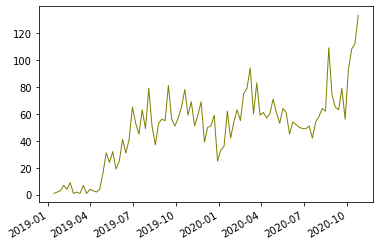

In [21]:
fig, ax = plt.subplots()
ax.plot( 'timestamp', 'tweet', data=count19.iloc[:-1], color='olive', linewidth=1)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

#plt.plot( 'timestamp', 'tweet', data=count19.iloc[:-1], color='olive', linewidth=1)
#plt.legend()
#plt.autofmt_xdate()
plt.savefig('tweet_count.png')

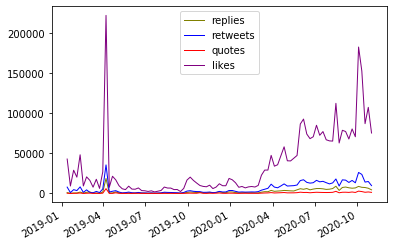

In [22]:
fig, ax = plt.subplots()


# rotate and align the tick labels so they look better
ax.plot( 'timestamp', 'replies', data=avg, color='olive', linewidth=1)
ax.plot( 'timestamp', 'retweets', data=avg, color='blue', linewidth=1)
ax.plot( 'timestamp', 'quotes', data=avg, color='red', linewidth=1)
ax.plot( 'timestamp', 'likes', data=avg, color='purple', linewidth=1)
fig.autofmt_xdate()

plt.legend()
plt.savefig('tweet_avg.png')

In [40]:
trump_samp = trump[trump['year']> 2019].sample(2928)
trump_samp.head(5)

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,year,hour,clean_text,full_score
172,1317051578872889345,RT @TGowdySC: Thank you to everyone who gave t...,t,f,Twitter for iPhone,0,3257,2020-10-16 10:35:40,2020,10,rt tgowdysc thank you to everyone who gave t...,0.9374
2091,1215622155318198272,RT @LindseyGrahamSC: To the House Dems and GOP...,t,f,Twitter for iPhone,0,4662,2020-01-10 13:11:21,2020,13,rt lindseygrahamsc to the house dems and gop...,0.2235
7923,1250928193755926531,https://t.co/lmb1H6I6en,f,f,Twitter for iPhone,132904,32910,2020-04-16 23:24:57,2020,23,https t co lmb1h6i6en,0.0000
7744,1230882784937267202,Four great candidates are under consideration ...,f,f,Twitter for iPhone,42314,8335,2020-02-21 15:51:39,2020,15,four great candidates are under consideration ...,0.6249
8810,1317805466269884417,RT @dougmillsnyt: .@realDonaldTrump addresses ...,t,f,Twitter for iPhone,0,5669,2020-10-18 12:31:21,2020,12,rt dougmillsnyt realdonaldtrump addresses ...,0.0000


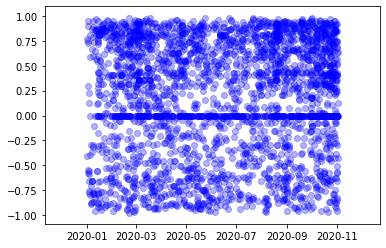

In [43]:
plt.scatter( 'timestamp', 'full_score', data=df[df['year']> 2019], alpha = 0.3, c = 'blue')
#plt.scatter( 'date', 'full_score', data = trump_samp, alpha = 0.3, c="red")
plt.show()

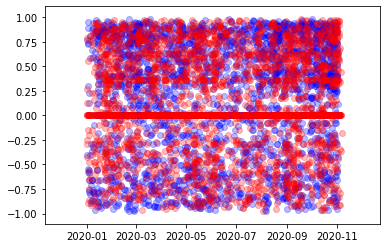

In [52]:
plt.scatter( 'timestamp', 'full_score', data=df[df['year']> 2019], alpha = 0.27, c='blue')
plt.scatter( 'date', 'full_score', data = trump_samp, alpha = 0.27, c="red")
plt.savefig('perdition.png')
plt.show()


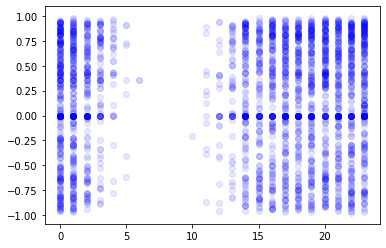

In [31]:
#plt.scatter('hour', 'full_score', data=trump[trump['year']>2019], alpha = 0.05, c= 'red')
plt.scatter('hour', 'full_score', data=df[df['year']>2019], alpha = 0.095, c= 'blue')
plt.savefig('b_time.png')
plt.show()

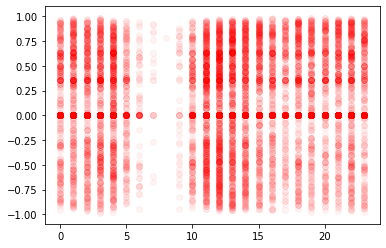

In [32]:
plt.scatter('hour', 'full_score', data=trump[trump['year']>2019], alpha = 0.045, c= 'red')
#plt.scatter('hour', 'full_score', data=df[df['year']>2019], alpha = 0.1, c= 'red')
plt.savefig('t_time.png')
plt.show()

In [370]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [371]:
from nltk.tokenize import word_tokenize

df['tokenized_text'] = df['clean_text'].apply(word_tokenize) 
df_19_20['tokenized_text'] = df_19_20['clean_text'].apply(word_tokenize) 

In [372]:
model = word2vec.Word2Vec(df_19_20['tokenized_text'], size=100, window=3, min_count=40)

In [373]:
words=list(model.wv.vocab)
print(words)

['white', 'and', 'their', 'should', 'have', 'no', 'place', 'in', 'this', 'country', 'let', 'a', 'voice', 'of', 'the', 'united', 'states', 'congress', 'https', 't', 'co', '“', 'equality', 'rights', 'under', 'law', 'not', 'be', 'or', 'on', '”', 'another', 'step', 'forward', 'for', 'dignity', 'tonight', 'as', 'equal', 'is', 'our', 'state', '’', 's', 'to', 'two', 'women', 'who', 'way', 'well', 'all', 'made', 'happen', 'still', 'with', 'us', 'it', 'has', 'into', 'soul', 'nation', 'will', 'we', 'must', 'from', 'his', 'final', 'do', 'part', 'make', 'america', 'what', 'an', 'without', 'justice', 'i', 'first', 'because', 'every', 'deserves', 'testing', 'can', 'again', 'single', 'one', 'today', 'never', 'stand', 'up', 'that', 'give', 'hate', 'safe', 'are', 'you', 'week', 'about', 'these', 'new', 'would', 'students', 'assault', 'making', 'heard', 'working', 'sure', 'put', 'been', 'since', 'long', 'before', 'her', 'house', 'm', 'so', 'grateful', 'your', 'work', 'proud', 'continue', 'done', 'much',

/Users/selina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


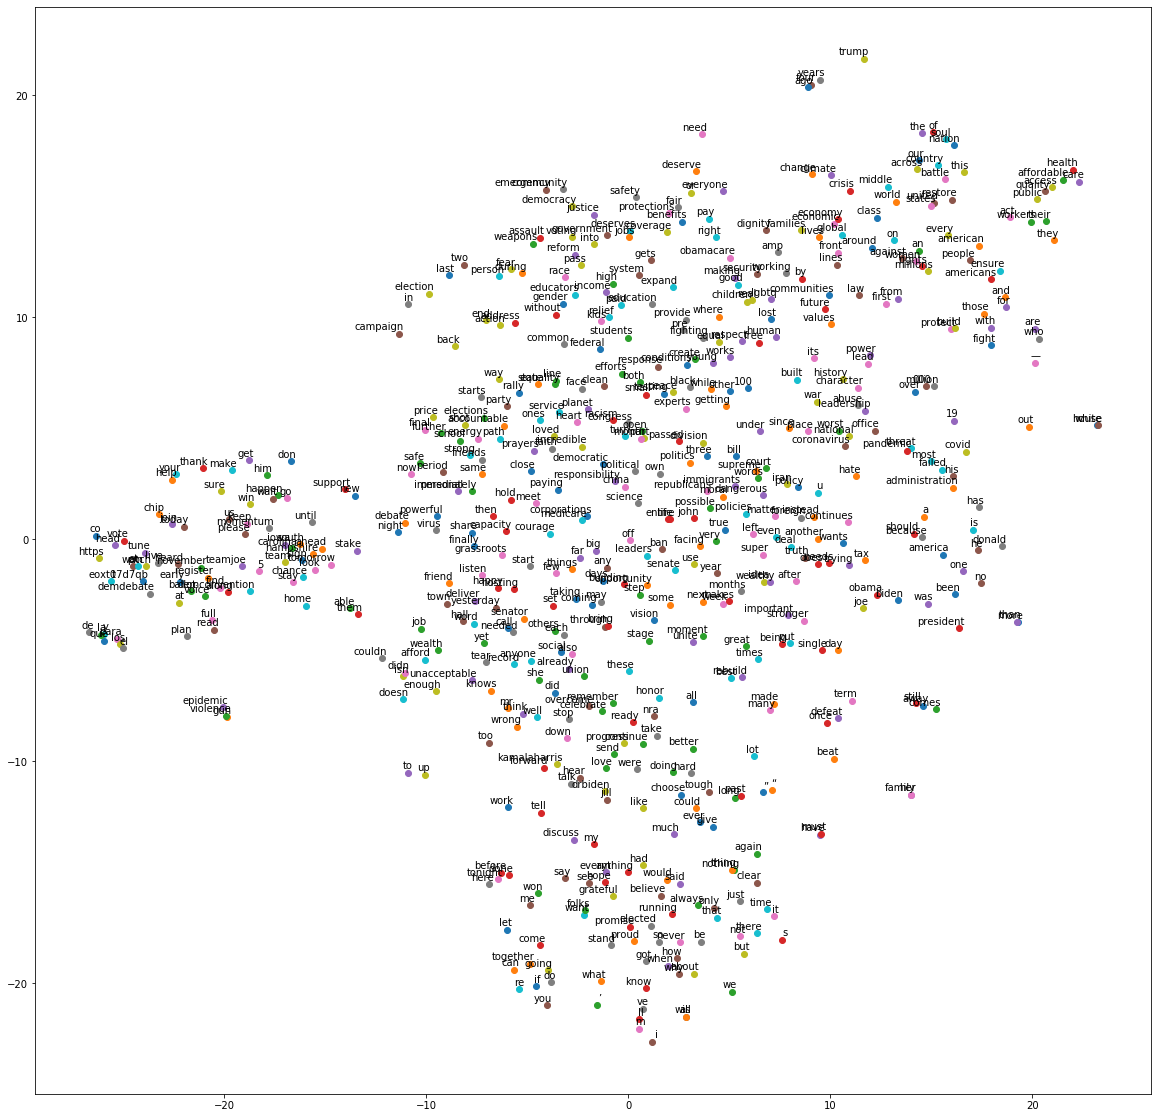

In [374]:
model = word2vec.Word2Vec(df_19_20['tokenized_text'], size=100, window=3, min_count=35)
#https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig('biden.png')
    plt.show()
    
tsne_plot(model)

In [375]:
trump_20['tokenized_text'] = trump_20['clean_text'].apply(word_tokenize) 

/Users/selina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


['i', 'was', 'to', 'be', 'back', 'in', 'the', 'great', 'city', 'of', 'north', 'carolina', 'with', 'thousands', 'american', 'who', 'love', 'our', 'country', 'and', 'always', 'put', 'america', 'first', 'thank', 'you', 'for', 'a', 'wonderful', 'https', 't', 'co', 'rt', 'read', 'court', 'by', 'news', 'where', 'there', 'will', 'action', 'mail', 'scam', 'is', 'major', 'amp', 'democrats', 'know', 'it', 'almost', 'all', 'this', 'system', 'even', 'much', 'far', 'ballots', 'have', 'up', 'being', 'disaster', 'large', 'numbers', 'fraud', 'very', 'here', 'about', 'comey', 's', 'media', 'if', 'those', 'whitehouse', 'president', 'realdonaldtrump', 'announced', 'historic', 'protect', 'right', 'public', '…', '“', '’', 'm', 'running', 'as', 'proud', 'democrat', 'senate', '”', 'sleepy', 'joe', 'biden', 'today', 'only', 'going', 'get', 'worse', 'not', 'china', 'own', 'us', 'getting', 'little', 'morning', 'gopchairwoman', 'economic', 'jobs', 'since', 'elected', 'tomfitton', 'he', 'should', 'from', 'white',

/Users/selina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/Users/selina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/selina/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 8294 missing from current font.
  font.load_char(ord(s), flags=flags)


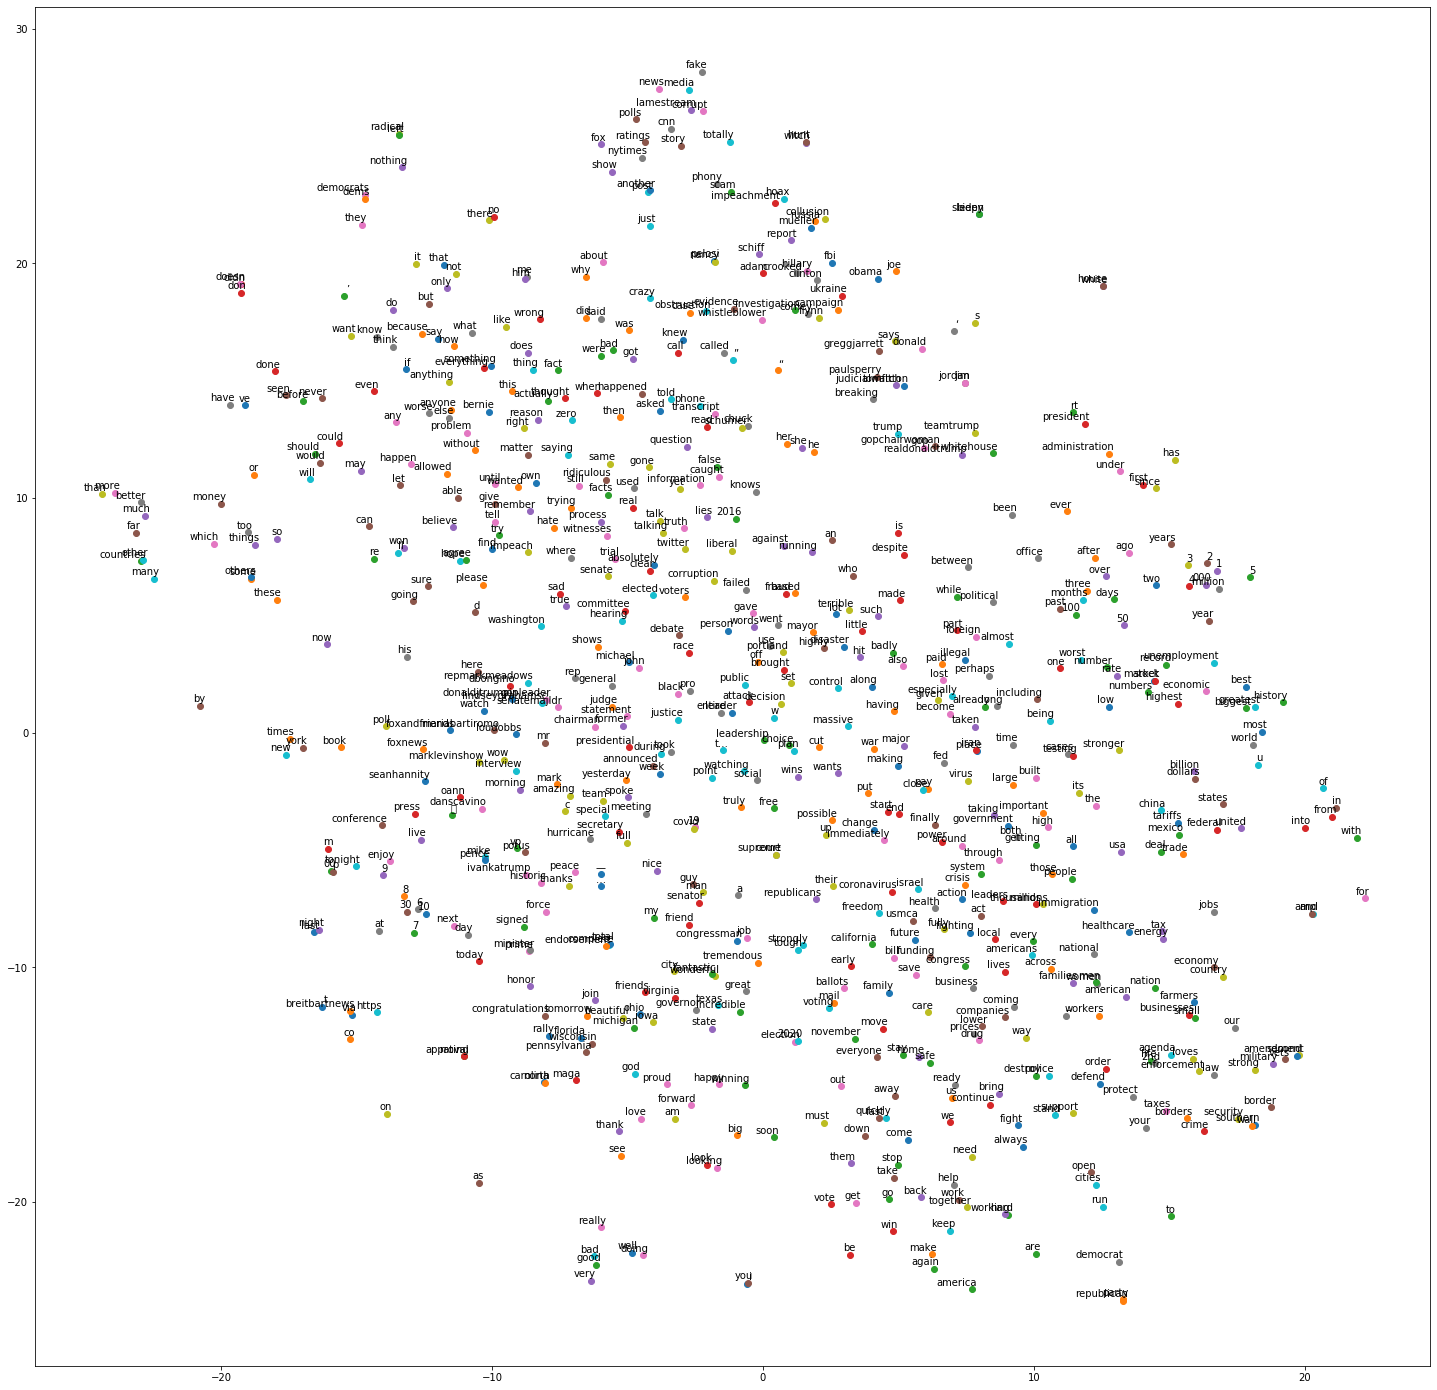

In [376]:
#https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
model = word2vec.Word2Vec(trump_20['tokenized_text'], size=100, window=6, min_count=80)
words=list(model.wv.vocab)
print(words)
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(25, 25)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.savefig('trump.png')
    plt.show()
    
tsne_plot(model)